In [106]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from funcs.simulation.sensitivity import database
from funcs.plots.sensitivity import sensitivity_plot, subscript

sns.set_style({'font.family': 'serif', 'font.serif': 'Computer Modern'})

In [2]:
db_file = "/d/DetResearch/scripts/sensitivity_2.sqlite"
tbl = database.Table(db_file, "data")
df = pd.DataFrame(
    tbl.fetch_test_rows()
).sort_values([
    "equivalence",
    "diluent_mol_frac"
]).reset_index(drop=True)
df

,date_stored,mechanism,initial_temp,initial_press,fuel,oxidizer,equivalence,diluent,diluent_mol_frac,inert,cj_speed,ind_len_west,ind_len_gav,ind_len_ng,cell_size_west,cell_size_gav,cell_size_ng,rxn_table_id
0,2021-03-01 13:46:24,gri30_highT.cti,300.0,101325.0,CH4,N2O,0.4,None,0.00,None,1979.909738,0.000437,0.000365,0.000756,0.012687,0.126534,0.024313,375217d512e64bd6be43015d59e6bcdf
1,2021-03-10 14:38:33,gri30_highT.cti,300.0,101325.0,CH4,N2O,0.4,CO2,0.10,None,1871.439983,0.001352,0.001160,0.002359,0.039198,0.920091,0.072792,3009d676785c4db59f7441ea1023b397
2,2021-03-12 07:56:16,gri30_highT.cti,300.0,101325.0,CH4,N2O,0.4,CO2,0.15,None,1818.167967,0.002484,0.002143,0.004367,0.072044,2.557206,0.131840,9b7009ba1e6c4626acf6296379273935
3,2021-02-27 23:07:05,gri30_highT.cti,300.0,101325.0,CH4,N2O,1.0,None,0.00,None,2197.021377,0.000236,0.000210,0.000418,0.006838,0.031909,0.012560,a71177ce60a2439db5f3a830a5edac79
4,2021-03-17 20:52:19,gri30_highT.cti,300.0,101325.0,CH4,N2O,1.0,CO2,0.05,None,2132.611277,0.000385,0.000348,0.000684,0.011168,0.082004,0.019974,28416d648c65456097ddccccab3f1f33
5,2021-02-26 09:17:40,gri30_highT.cti,300.0,101325.0,CH4,N2O,1.0,CO2,0.10,None,2069.145076,0.000646,0.000587,0.001151,0.018743,0.211513,0.032532,b3ef01f9ae374428bc15023b61471ea2
6,2021-03-16 08:33:59,gri30_highT.cti,300.0,101325.0,CH4,N2O,1.0,CO2,0.15,None,2006.699768,0.001114,0.001029,0.001987,0.032305,0.559715,0.054035,2e30ca39e43e4a8b809a260c886b6560


In [107]:
df_pert = pd.DataFrame(columns=["phi", "dil_mf"])
for _, r in df.iterrows():
    df_pert = pd.concat((
        df_pert,
        pd.DataFrame(
            tbl.fetch_pert_table(r["rxn_table_id"])
        ).sort_values("rxn_no")
    ))
    new_data_mask = pd.isna(df_pert["phi"])
    df_pert.loc[new_data_mask, "phi"] = r["equivalence"]
    df_pert.loc[new_data_mask, "dil_mf"] = r[ "diluent_mol_frac"]
df_pert.reset_index(drop=True, inplace=True)
for col in df_pert.columns:
    if col != "rxn" and col != "stored_date":
        df_pert[col] = pd.to_numeric(df_pert[col])
df_pert["rxn"] = df_pert["rxn"].\
        str.replace('<=>', '\u2194')\
        .str.replace('=>', '\u2192')\
        .str.replace('<=', '\u2190')\
        .apply(subscript, args=('s',))
df_pert

,phi,dil_mf,stored_date,rxn_no,rxn,k_i,ind_len_west,ind_len_gav,ind_len_ng,cell_size_west,cell_size_gav,cell_size_ng,sens_ind_len_west,sens_ind_len_gav,sens_ind_len_ng,sens_cell_size_west,sens_cell_size_gav,sens_cell_size_ng
0,0.4,0.00,2021-03-01 19:59:53,0.0,2 O + M ↔ O₂ + M,1.790322e+07,0.000437,0.000365,0.000756,0.012687,0.126534,0.024313,1.961606e-06,1.402044e-06,3.206081e-06,1.961606e-06,-8.164918e-07,6.570627e-06
1,0.4,0.00,2021-03-01 20:20:59,1.0,H + O + M ↔ OH + M,7.459675e+07,0.000437,0.000365,0.000756,0.012687,0.126534,0.024313,1.842131e-06,1.755370e-06,3.040409e-06,1.842131e-06,-1.675616e-07,4.956844e-06
2,0.4,0.00,2021-03-01 20:02:15,2.0,H₂ + O ↔ H + OH,5.247398e+03,0.000437,0.000365,0.000756,0.012686,0.126532,0.024327,-3.194056e-03,-2.831363e-03,4.581279e-02,-3.194056e-03,-1.332922e-03,5.594854e-02
3,0.4,0.00,2021-03-01 20:07:52,3.0,HO₂ + O ↔ O₂ + OH,2.020000e+10,0.000437,0.000365,0.000756,0.012687,0.126534,0.024313,1.080844e-04,9.844996e-05,1.274229e-04,1.080844e-04,5.085889e-05,1.429621e-04
4,0.4,0.00,2021-03-01 20:03:31,4.0,H₂O₂ + O ↔ HO₂ + OH,1.067211e+06,0.000437,0.000365,0.000756,0.012687,0.126534,0.024313,1.491236e-07,3.848416e-07,2.280278e-06,1.491236e-07,-8.365301e-09,2.769217e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,1.0,0.15,2021-03-17 05:56:59,320.0,C₃H₇ + H ↔ C₂H₅ + CH₃,2.451271e+08,0.001114,0.001029,0.001987,0.032305,0.559715,0.054035,-4.539598e-05,-4.386969e-05,-3.657749e-05,-4.539598e-05,3.342477e-05,-3.490412e-05
2271,1.0,0.15,2021-03-17 06:10:57,321.0,C₃H₇ + OH ↔ C₂H₅ + CH₂OH,2.434100e+10,0.001114,0.001029,0.001987,0.032305,0.559715,0.054035,-3.956703e-05,-3.449115e-05,-3.808270e-05,-3.956703e-05,2.034453e-05,-3.779650e-05
2272,1.0,0.15,2021-03-17 06:05:38,322.0,C₃H₇ + HO₂ ↔ C₃H₈ + O₂,5.364000e+08,0.001114,0.001029,0.001987,0.032305,0.559715,0.054035,-1.095608e-07,-2.636060e-07,-6.862549e-07,-1.095608e-07,-3.554129e-07,-6.188338e-07
2273,1.0,0.15,2021-03-17 06:08:41,323.0,C₃H₇ + HO₂ → C₂H₅ + CH₂O + OH,2.434100e+10,0.001114,0.001029,0.001987,0.032305,0.559715,0.054035,-4.593139e-07,-5.583445e-07,1.578207e-07,-4.593139e-07,-1.912938e-07,1.132990e-07


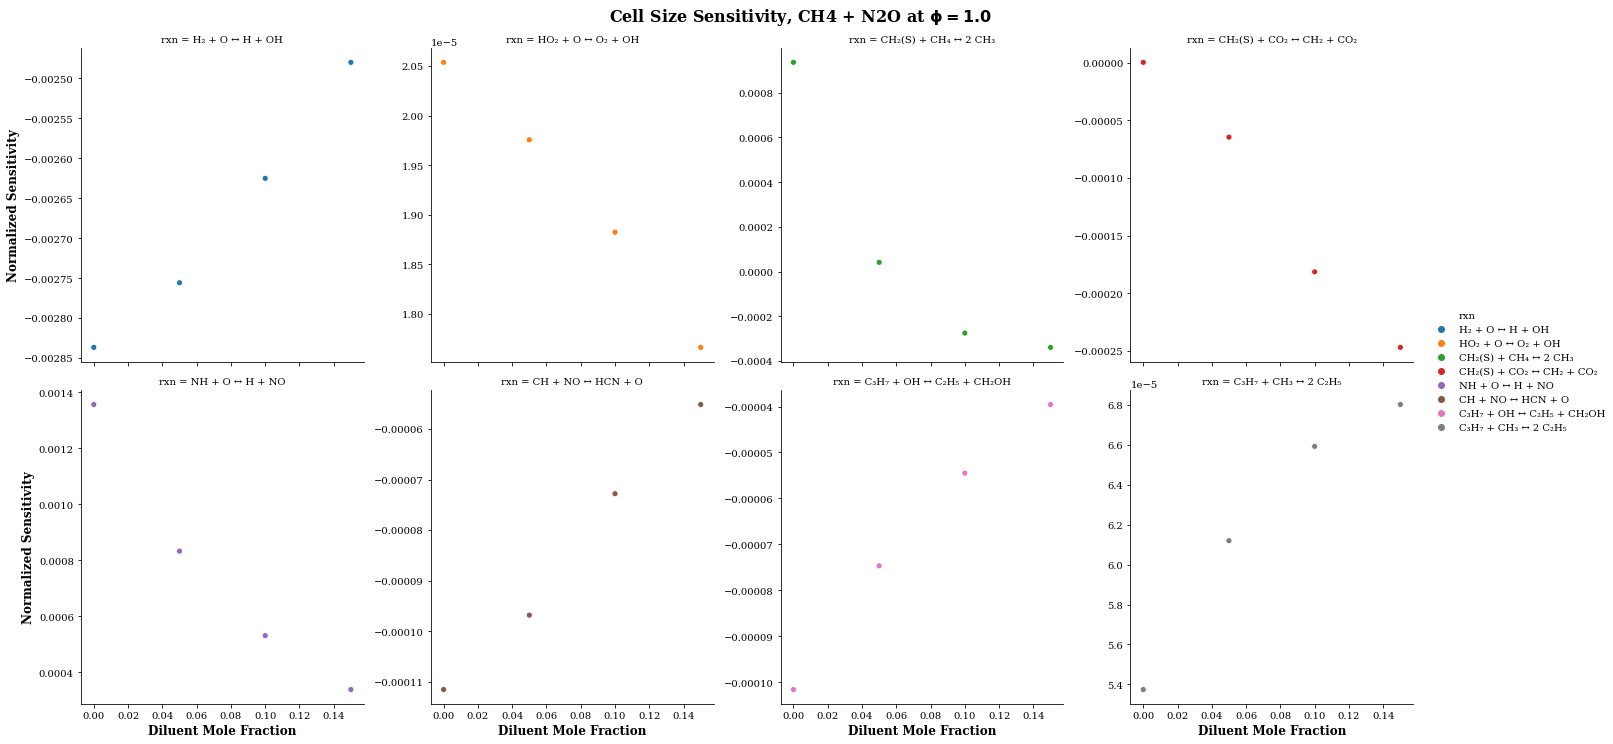

In [124]:
phi = 1
df_filtered = df_pert[np.isclose(df_pert["phi"].values.astype(float), phi)]
rxn_filtered = df_filtered["rxn"].unique()[(df_filtered.groupby("rxn")["sens_cell_size_west"].min().abs() > 0.025)]
df_filtered = df_filtered[df_filtered["rxn"].isin(rxn_filtered)]
# fig, ax = plt.subplots(figsize=(12, 4))
g = sns.relplot(
    x="dil_mf",
    y="sens_cell_size_west",
    hue="rxn",
    col="rxn",
    data=df_filtered,
#     ax=ax,
    kind="scatter",
    facet_kws={'sharey': False, 'sharex': True},
    col_wrap=4,
#     aspect=3,
#     height=3,
)
# plt.xticks(rotation=90)
g.set_xlabels("Diluent Mole Fraction", size=12, weight="bold")
g.set_ylabels("Normalized Sensitivity", size=12, weight="bold")
plt.suptitle(
    r"Cell Size Sensitivity, CH4 + N2O at $\mathbf{\phi=%1.1f}$"%phi,
    size=16, 
    weight="bold",
    y=1.025
)
sns.despine()